In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fahim1710","key":"4c55530a748c01aa0de5f33c4561580a"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 65.7MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 59.7MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.2MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.6MB/s]


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils

%matplotlib inline

In [0]:
df_train = pd.read_csv('train.csv')
# test_data = pd.read_csv('test.csv')
# df_train["SalePrice"].describe()
# df_train.columns

Skewness: 1.882876
Kurtosis: 6.536282


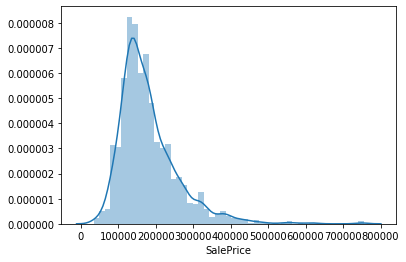

In [8]:
sns.distplot(df_train['SalePrice'])
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

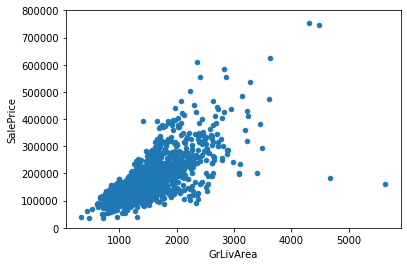

In [9]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

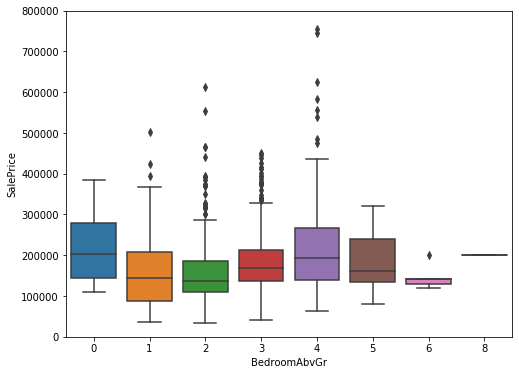

In [10]:
var = 'BedroomAbvGr'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

(38, 38)


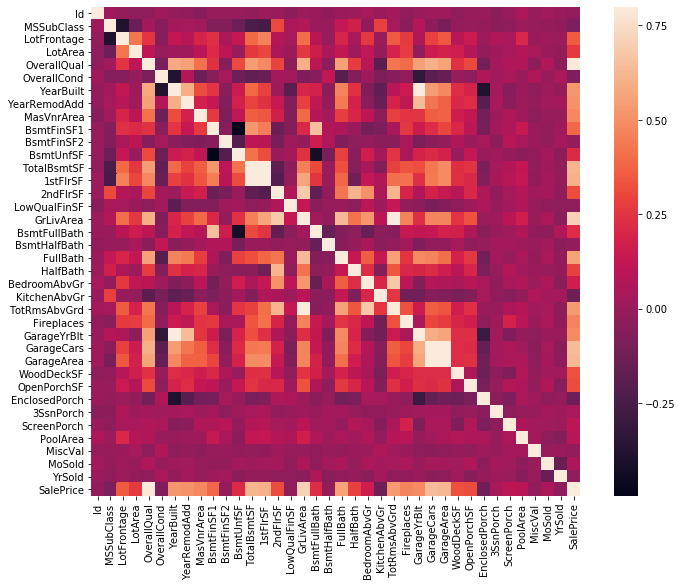

In [11]:
#correlation matrix
corrmat = df_train.corr()
print(corrmat.shape)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [12]:
xcols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X_train = df_train[xcols]
y_train = df_train['SalePrice']
print(y_train)
# X_train = preprocessing.normalize(X_train, norm='l2')
X_train = preprocessing.scale(X_train)
# y_train = preprocessing.scale(y_train)
y_train = y_train/208500
print(y_train)

total = train_X.isnull().sum().sort_values(ascending=False)
percent = (train_X.isnull().sum()/train_X.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
0       1.000000
1       0.870504
2       1.071942
3       0.671463
4       1.199041
          ...   
1455    0.839329
1456    1.007194
1457    1.278177
1458    0.681655
1459    0.707434
Name: SalePrice, Length: 1460, dtype: float64


NameError: ignored

In [0]:
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 1
# OPTIMIZER = SGD()
# OPTIMIZER = RMSprop()
OPTIMIZER = Adam()
N_HIDDEN = 5
VALIDATION_SPLIT = 0.2
N_HIDDEN = 13
DROPOUT = 0.3

In [0]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_dim=6))
model.add(Activation('relu'))
# model.add(Dropout(DROPOUT))

model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
# model.add(Dropout(DROPOUT))

model.add(Dense(NB_CLASSES))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error',optimizer= OPTIMIZER, metrics=['mse','mae'])
model.summary()

In [0]:
history = model.fit(X_train, y_train, batch_size= BATCH_SIZE, epochs= NB_EPOCH, verbose= VERBOSE, validation_split= VALIDATION_SPLIT )


In [0]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
test_data = pd.read_csv('test.csv')
X_test = test_data[xcols]
X_test = preprocessing.scale(X_test)
prediction = model.predict(X_test)
prediction = prediction*208500
print(prediction)
final_results = pd.DataFrame(prediction)
expo = final_results.to_csv(r'final_results.csv', index = None, header=False)